In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

%matplotlib inline

In [102]:
df_2020 = pd.read_csv('data/batting/2020_full_players_batting.csv')
df_2019_60 = pd.read_csv('data/batting/2019_first60_players_batting.csv')
df_2018_60 = pd.read_csv('data/batting/2018_first60_players_batting.csv')
df_2020_home = pd.read_csv('data/batting/2020_Home_Splits_Players_Batting_Advanced.csv')
df_2020_away = pd.read_csv('data/batting/2020_Away_Splits_Players_Batting_Advanced.csv')
df_2019_home = pd.read_csv('data/batting/2019_60_home_splits_player_batting_advanced.csv')
df_2019_away = pd.read_csv('data/batting/2019_60_away_splits_player_batting_advanced.csv')


In [3]:
df_2020_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    260 non-null    int64  
 1   Name      260 non-null    object 
 2   Tm        260 non-null    object 
 3   PA        260 non-null    int64  
 4   BB%       260 non-null    float64
 5   K%        260 non-null    float64
 6   BB/K      260 non-null    float64
 7   AVG       260 non-null    float64
 8   OBP       260 non-null    float64
 9   SLG       260 non-null    float64
 10  OPS       260 non-null    float64
 11  ISO       260 non-null    float64
 12  BABIP     260 non-null    float64
 13  wRC       260 non-null    float64
 14  wRAA      260 non-null    float64
 15  wOBA      260 non-null    float64
 16  wRC+      260 non-null    float64
 17  playerId  260 non-null    int64  
dtypes: float64(13), int64(3), object(2)
memory usage: 36.7+ KB


In [4]:
df_2020_slice = df_2020[['Name', 'Team', 'HR']]

In [5]:
df_2020_slice

,Name,Team,HR
0,Juan Soto,Nationals,13
1,Freddie Freeman,Braves,13
2,Marcell Ozuna,Braves,18
3,DJ LeMahieu,Yankees,10
4,Jose Ramirez,Indians,17
...,...,...,...
137,Erik Gonzalez,Pirates,3
138,Evan White,Mariners,8
139,Eduardo Escobar,Diamondbacks,4
140,Javier Baez,Cubs,8


In [6]:
df_2019 = pd.read_csv('data/batting/2019_full_players_batting.csv')

In [7]:
# df_2020['SwStr%'] = df_2020['SwStr%'].map(lambda x: x.lstrip('+-').rstrip('%'))
# df_2020['SwStr%'] = pd.to_numeric(df_2020['SwStr%'])
# df_2019['SwStr%'] = df_2019['SwStr%'].map(lambda x: x.lstrip('+-').rstrip('%'))
# df_2019['SwStr%'] = pd.to_numeric(df_2019['SwStr%'])

# df_2019['BB%'] = df_2019['BB%'].map(lambda x: x.lstrip('+-').rstrip('%'))
# df_2019['BB%'] = pd.to_numeric(df_2019['BB%'])

# df_2020['BB%'] = df_2020['BB%'].map(lambda x: x.lstrip('+-').rstrip('%'))
# df_2020['BB%'] = pd.to_numeric(df_2020['BB%'])

In [8]:
def percent_to_int(dfs, cols):
    for df in dfs:
        for col in cols:
            df[col] = pd.to_numeric(df[col].map(lambda x: x.lstrip('+-').rstrip('%')))
    return dfs

In [9]:
lst_of_cols = ['SwStr%', 'BB%', 'K%', 'Contact%', 'O-Swing%', 'Barrel%']
lst_of_dfs = (df_2020, df_2019_60, df_2018_60, df_2019)

percent_to_int(lst_of_dfs, lst_of_cols)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      142 non-null    object 
 1   Team      142 non-null    object 
 2   G         142 non-null    int64  
 3   PA        142 non-null    int64  
 4   HR        142 non-null    int64  
 5   R         142 non-null    int64  
 6   RBI       142 non-null    int64  
 7   SB        142 non-null    int64  
 8   BB%       142 non-null    float64
 9   K%        142 non-null    float64
 10  ISO       142 non-null    float64
 11  BABIP     142 non-null    float64
 12  AVG       142 non-null    float64
 13  OBP       142 non-null    float64
 14  SLG       142 non-null    float64
 15  wOBA      142 non-null    float64
 16  wRC+      142 non-null    int64  
 17  EV        142 non-null    float64
 18  BsR       142 non-null    float64
 19  Off       142 non-null    float64
 20  Def       142 non-null    float6

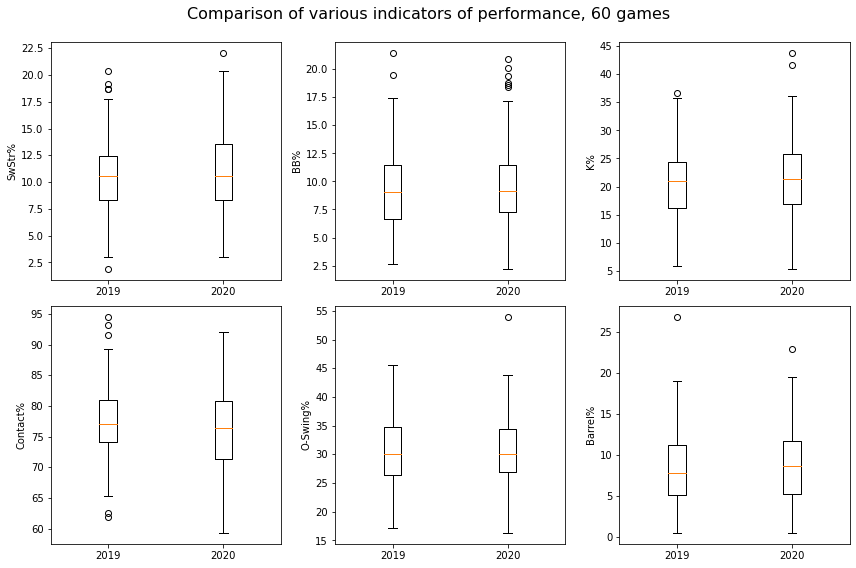

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot([df_2019_60[lst_of_cols[i]], df_2020[lst_of_cols[i]]])
    ax.set_xticks([1,2])
    ax.set_xticklabels([2019, 2020])
    ax.set_ylabel(lst_of_cols[i])

fig.suptitle('Comparison of various indicators of performance, 60 games', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('percent_boxplots')

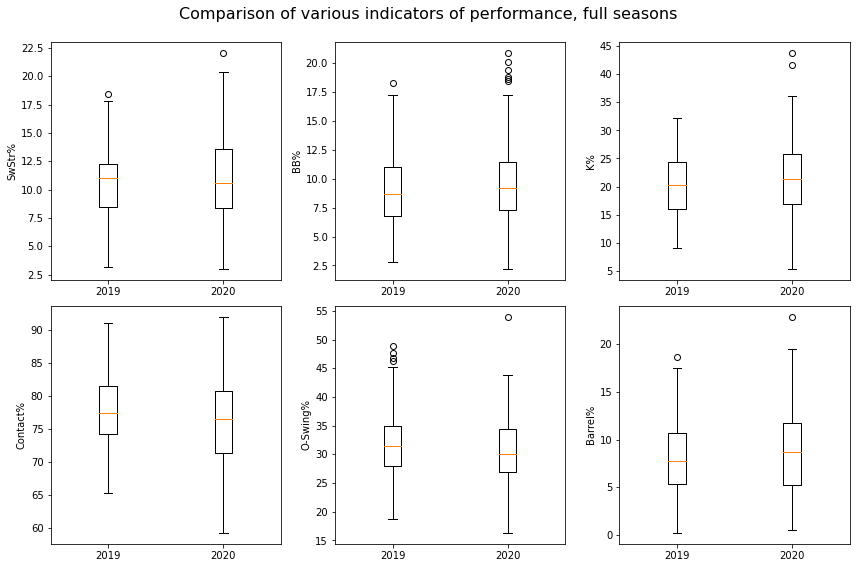

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot([df_2019[lst_of_cols[i]], df_2020[lst_of_cols[i]]])
    ax.set_xticks([1,2])
    ax.set_xticklabels([2019, 2020])
    ax.set_ylabel(lst_of_cols[i])

fig.suptitle('Comparison of various indicators of performance, full seasons', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('percent_boxplots')

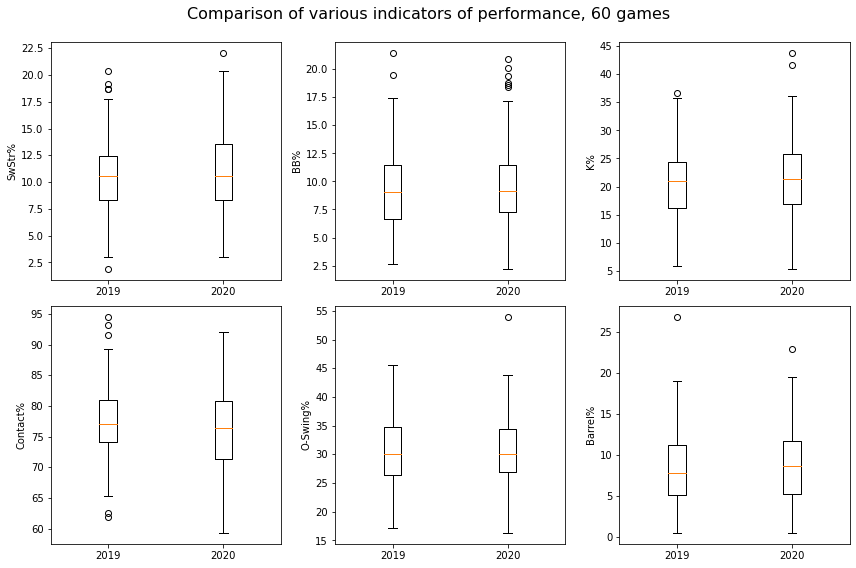

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot([df_2019_60[lst_of_cols[i]], df_2020[lst_of_cols[i]]])
    ax.set_xticks([1,2])
    ax.set_xticklabels([2019, 2020])
    ax.set_ylabel(lst_of_cols[i])

fig.suptitle('Comparison of various indicators of performance, 60 games', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('percent_boxplots')

In [13]:
lst_of_plots = ['wRC+', 'HR', 'R', 'Hard%+', 'EV', 'WPA']

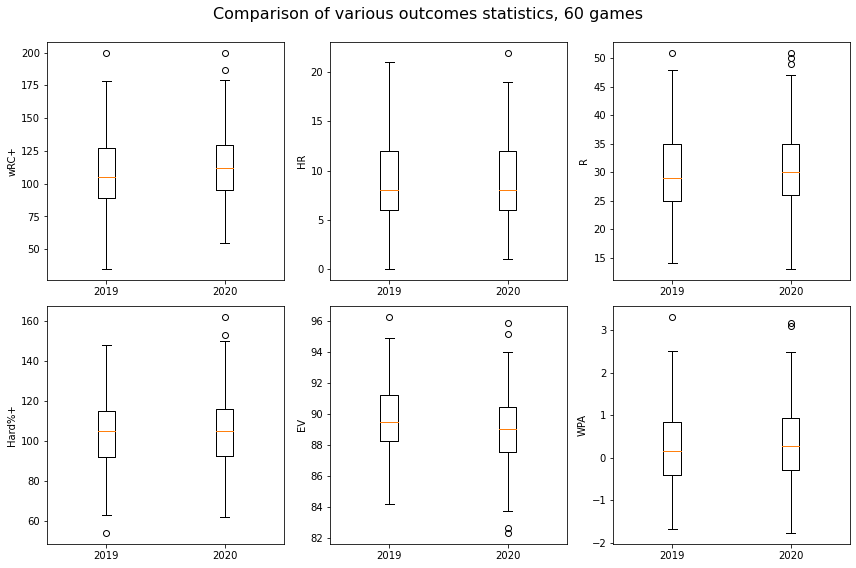

In [72]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot([df_2019_60[lst_of_plots[i]], df_2020[lst_of_plots[i]]])
    ax.set_xticks([1,2])
    ax.set_xticklabels([2019, 2020])
    ax.set_ylabel(lst_of_plots[i])

fig.suptitle('Comparison of various outcomes statistics, 60 games', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('outcomes_boxplots.png')

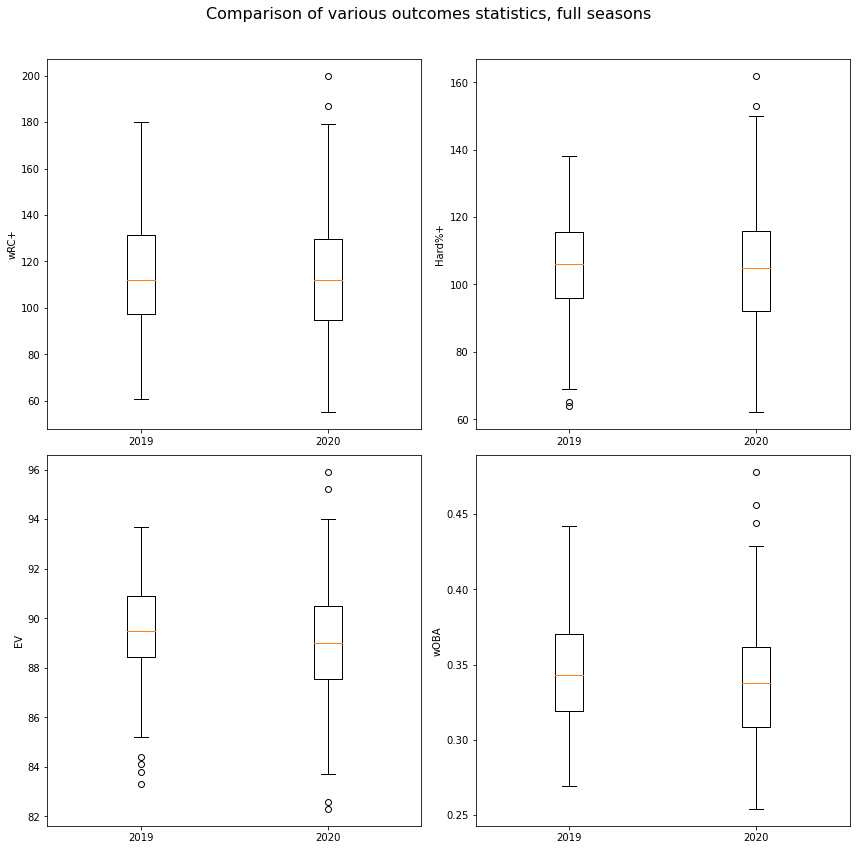

In [73]:
lst_of_plots2 = ['wRC+', 'Hard%+', 'EV', 'wOBA']

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot([df_2019[lst_of_plots2[i]], df_2020[lst_of_plots2[i]]])
    ax.set_xticks([1,2])
    ax.set_xticklabels([2019, 2020])
    ax.set_ylabel(lst_of_plots2[i])

fig.suptitle('Comparison of various outcomes statistics, full seasons', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('outcomes_boxplots2.png')

In [16]:
df_2019_2020 = pd.merge(df_2019_60, df_2020, on='Name', how='inner')

In [17]:
df_2019_2020.info

<bound method DataFrame.info of                  Name     Team_x  Age  G_x   AB  PA_x   H  1B  2B  3B  ...  \
0      Cody Bellinger    Dodgers   23   57  206   245  77  44  13   1  ...   
1      Anthony Rendon  Nationals   29   44  159   191  54  24  18   2  ...   
2    Christian Yelich    Brewers   27   52  190   229  59  28   8   2  ...   
3          Joey Gallo    Rangers   25   49  167   210  47  18  11   1  ...   
4           Josh Bell    Pirates   26   57  222   249  74  33  21   2  ...   
..                ...        ...  ...  ...  ...   ...  ..  ..  ..  ..  ...   
88   Jurickson Profar  Athletics   26   52  191   211  37  23   5   0  ...   
89   Brandon Crawford     Giants   32   55  189   211  40  28   6   1  ...   
90       Kevin Pillar      - - -   30   57  206   220  46  29  11   0  ...   
91      Maikel Franco   Phillies   26   56  193   214  40  23  10   0  ...   
92  Jeimer Candelario     Tigers   25   42  153   174  27  18   6   1  ...   

    Hard%+_y  EV.1  LA_y  Barre

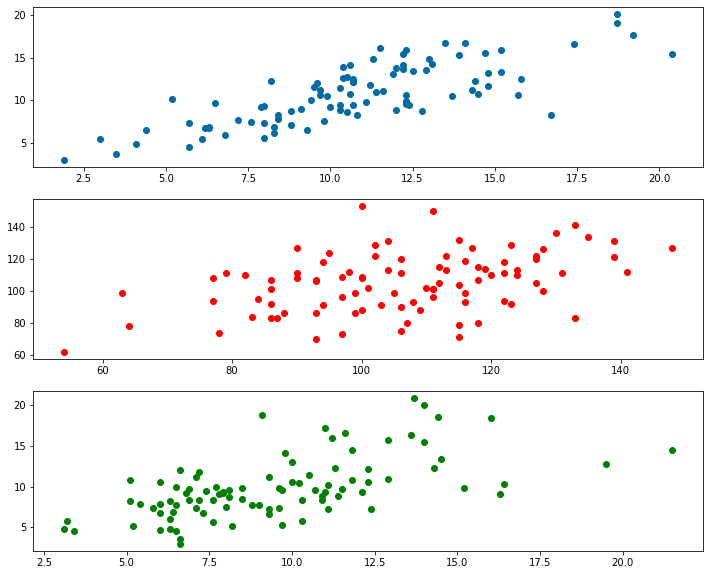

In [18]:
fig, ax = plt.subplots(3, figsize=(12, 10))

ax[0].scatter(df_2019_2020['SwStr%_x'], df_2019_2020['SwStr%_y'])
ax[1].scatter(df_2019_2020['Hard%+_x'], df_2019_2020['Hard%+_y'], color='red')
ax[2].scatter(df_2019_2020['BB%_x'], df_2019_2020['BB%_y'], color='green')

In [19]:
betts_bref_2020 = pd.read_html('https://www.baseball-reference.com/players/gl.fcgi?id=bettsmo01&t=b&year=2020')

In [20]:
betts_gamelogs_2020 = betts_bref_2020[4]
betts_gamelogs_2020['Rk'] = pd.to_numeric(betts_gamelogs_2020['Rk'], errors='coerce')
betts_gamelogs_2020.drop(['Gcar', 'Tm', 'Unnamed: 5', 'Opp', 'Rslt', 'Inngs'], inplace=True, axis=1)

In [21]:
betts_gamelogs_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       55 non-null     float64
 1   Gtm      57 non-null     object 
 2   Date     57 non-null     object 
 3   PA       58 non-null     object 
 4   AB       58 non-null     object 
 5   R        58 non-null     object 
 6   H        58 non-null     object 
 7   2B       58 non-null     object 
 8   3B       58 non-null     object 
 9   HR       58 non-null     object 
 10  RBI      58 non-null     object 
 11  BB       58 non-null     object 
 12  IBB      56 non-null     object 
 13  SO       58 non-null     object 
 14  HBP      58 non-null     object 
 15  SH       58 non-null     object 
 16  SF       56 non-null     object 
 17  ROE      58 non-null     object 
 18  GDP      56 non-null     object 
 19  SB       58 non-null     object 
 20  CS       58 non-null     object 
 21  BA       58 non-nu

In [22]:
betts_gamelogs_2020.dropna(inplace=True)

In [23]:
df_2019_2020[['wRC+_x','wRC+_y']]

,wRC+_x,wRC+_y
0,200,114
1,178,156
2,172,112
3,168,77
4,173,78
...,...,...
88,66,111
89,65,112
90,57,106
91,53,106


In [24]:
df_joined_plot = df_2019_2020[['Name', 'Team_x', 'Age', 'wRC+_x', 'wRC+_y', 'Hard%+_x', 'Hard%+_y', 'WPA_x', 'WPA_y', 'Clutch_x', 'Clutch_y']]

df_joined_plot.groupby('Age').count()

,Name,Team_x,wRC+_x,wRC+_y,Hard%+_x,Hard%+_y,WPA_x,WPA_y,Clutch_x,Clutch_y
Age,,,,,,,,,,
20,1,1,1,1,1,1,1,1,1,1
21,1,1,1,1,1,1,1,1,1,1
22,2,2,2,2,2,2,2,2,2,2
23,4,4,4,4,4,4,4,4,4,4
24,6,6,6,6,6,6,6,6,6,6
25,10,10,10,10,10,10,10,10,10,10
26,15,15,15,15,15,15,15,15,15,15
27,10,10,10,10,10,10,10,10,10,10
28,11,11,11,11,11,11,11,11,11,11


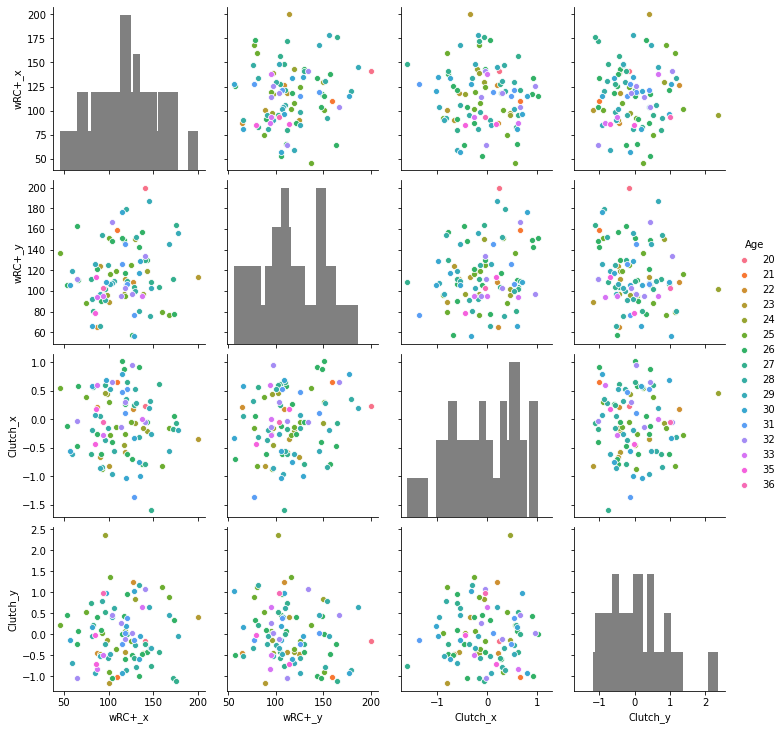

In [25]:
variables = ['wRC+_x', 'wRC+_y','Clutch_x', 'Clutch_y']

g = sns.PairGrid(df_joined_plot, hue="Age", vars=variables)
g.map_diag(plt.hist, color="gray")
# g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.savefig('pairgrid2.png')

# t-test

In [51]:
wOBA_2019 = df_2019_60['wOBA']
wOBA_2020 = df_2020['wOBA']

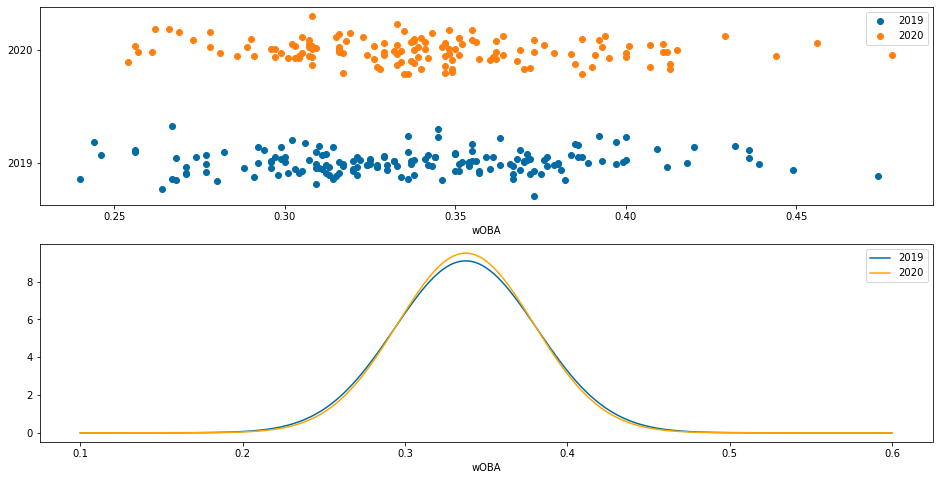

In [78]:
fig, ax = plt.subplots(2, figsize=(16, 8))
x = np.linspace(0.1, 0.6, num=500)
normal_approx_2019 = scs.norm(loc=wOBA_2019.mean(), scale=np.sqrt(np.var(wOBA_2019, ddof=1)))
normal_approx_2020 = scs.norm(loc=wOBA_2019.mean(), scale=np.sqrt(np.var(wOBA_2020, ddof=1)))


ax[0].scatter(wOBA_2019, np.repeat(0, len(wOBA_2019)) + np.random.normal(0, 0.1, len(wOBA_2019)))
ax[0].scatter(wOBA_2020, np.repeat(1, len(wOBA_2020)) + np.random.normal(0, 0.1, len(wOBA_2020)))
ax[0].set_yticks([0, 1])
ax[0].set_yticklabels(["2019", "2020"])
ax[0].set_xlabel('wOBA')
ax[0].legend(['2019', '2020'])
ax[1].plot(x, normal_approx_2019.pdf(x))
ax[1].plot(x, normal_approx_2020.pdf(x), color='orange')
ax[1].set_xlabel('wOBA')
ax[1].legend(['2019', '2020'])
plt.savefig('normal_approx.png')

In [89]:
t_stat, p_val = scs.ttest_ind(wOBA_2019, wOBA_2020)
print(p_val)
t_stat


0.4956372095167615


-0.6821836332943442

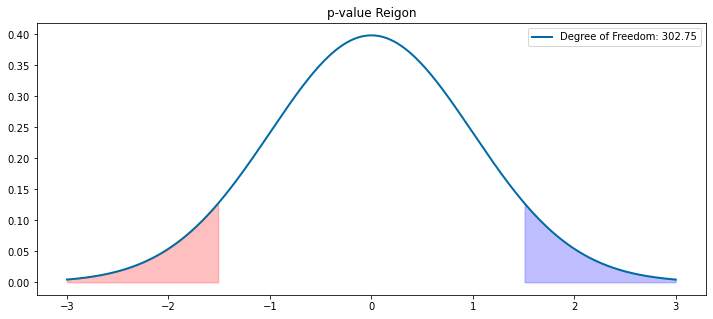

In [95]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(wOBA_2019, wOBA_2020)

x = np.linspace(-3, 3, num=500)

fig, ax = plt.subplots(1, figsize=(12, 5))
students = scs.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= 1.5), color="blue", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= -1.5), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")
plt.savefig('p_val_region.png')